In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv("C:/Users/kutay/OneDrive/Desktop/Python/dirty-cafe-sales/data/dirty_cafe_sales.csv")

In [4]:
print("First 5 Rows:\n", df.head())

First 5 Rows:
   Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [5]:
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.lower())

In [6]:
df.replace(['unknown', 'n/a', 'error', 'null', 'nan'], np.nan, inplace=True)

In [7]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [8]:
duplicates = df[df.duplicated()]
print(f"\n Duplicate rows found: {duplicates.shape[0]}")


 Duplicate rows found: 0


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64


In [10]:
df['Month'] = df['Transaction Date'].dt.to_period('M')
df['Weekday'] = df['Transaction Date'].dt.day_name()

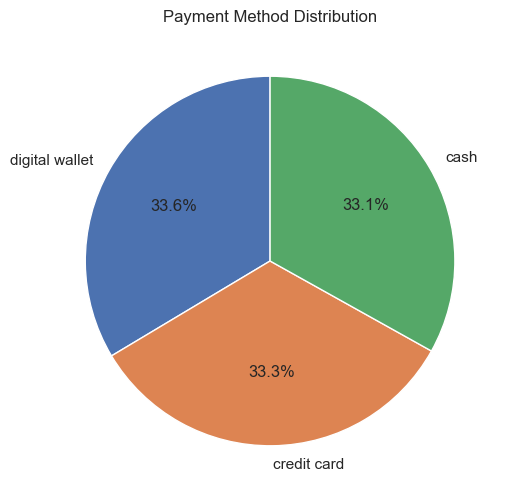

In [11]:
df['Payment Method'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

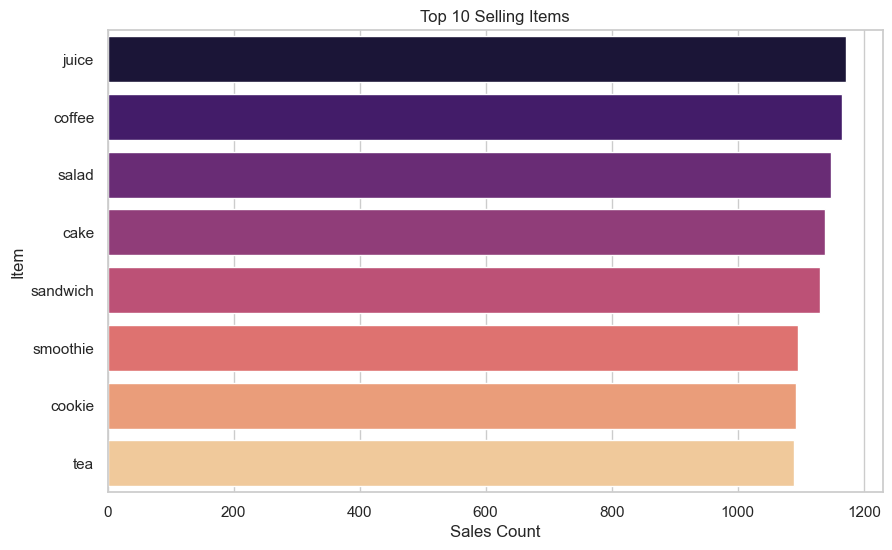

In [12]:
top_items = df['Item'].value_counts().nlargest(10)
sns.barplot(
    x=top_items.values,
    y=top_items.index,
    hue=top_items.index,
    palette="magma",
    legend=False
)
plt.title("Top 10 Selling Items")
plt.xlabel("Sales Count")
plt.ylabel("Item")
plt.show()

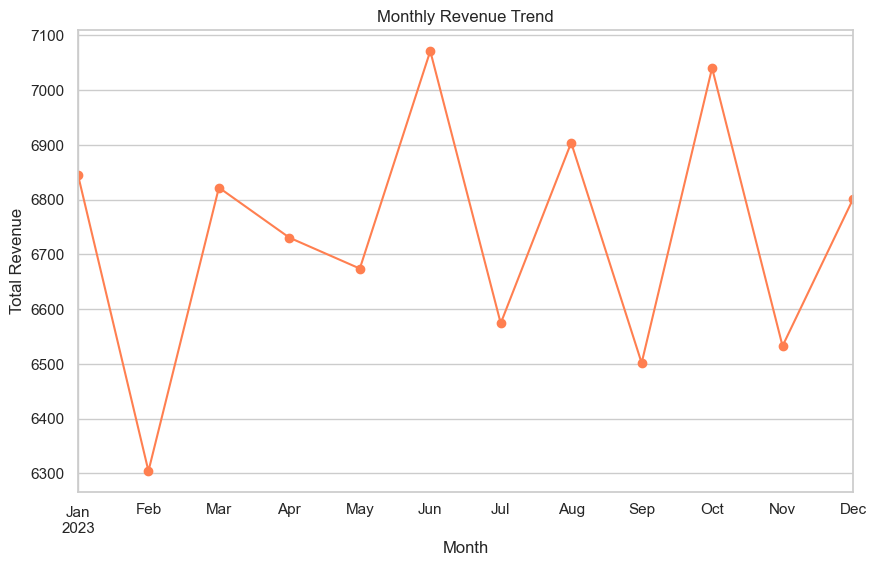

In [13]:
monthly_sales = df.groupby('Month')['Total Spent'].sum()
monthly_sales.plot(kind='line', marker='o', color='coral')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

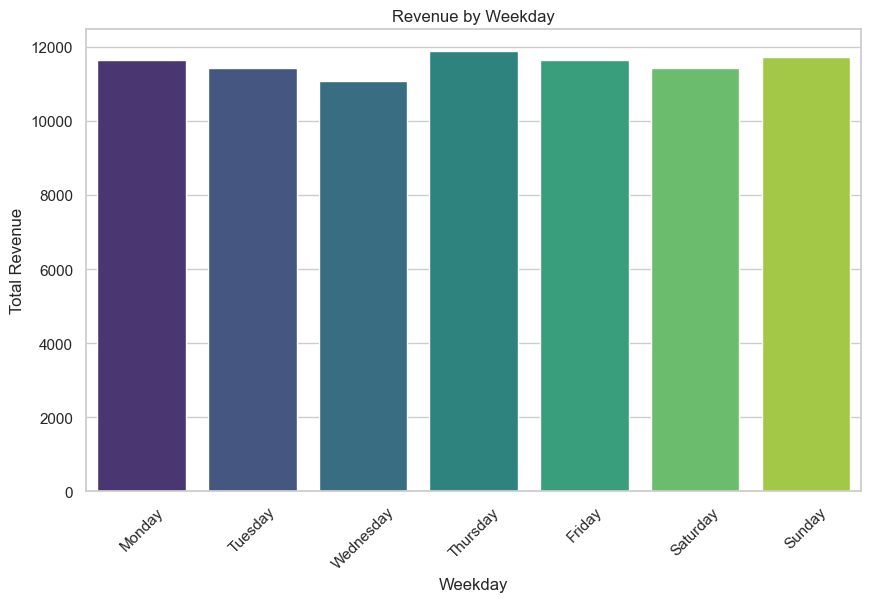

In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales_df = (
    df.groupby('Weekday')['Total Spent']
    .sum()
    .reindex(weekday_order)
    .reset_index()
)

sns.barplot(
    data=weekday_sales_df,
    x='Weekday',
    y='Total Spent',
    hue='Weekday',
    palette="viridis",
    legend=False  
)
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


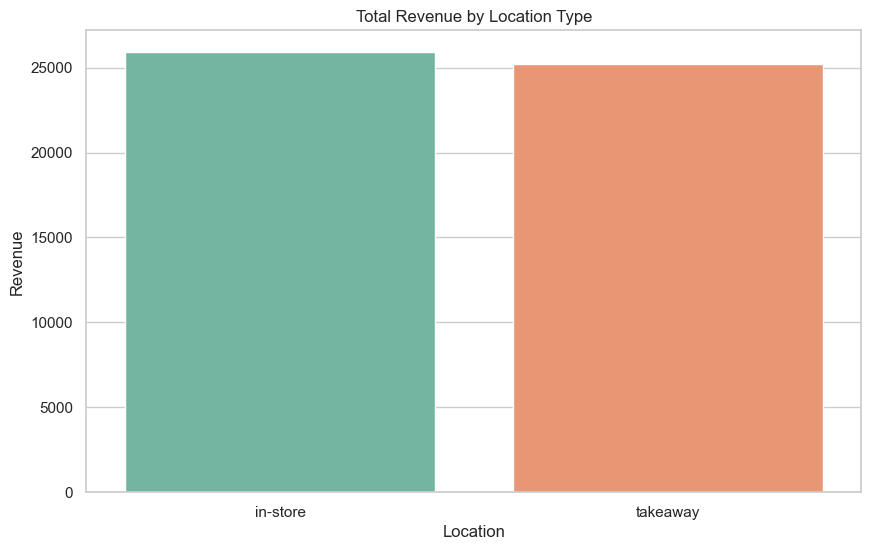

In [22]:
location_stats = df.groupby('Location').agg({
    'Quantity': 'sum',
    'Total Spent': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Transaction Count'})
location_stats_reset = location_stats.reset_index()

sns.barplot(
    data=location_stats_reset,
    x='Location',
    y='Total Spent',
    hue='Location',
    palette="Set2",
    legend=False
)
plt.title("Total Revenue by Location Type")
plt.xlabel("Location")
plt.ylabel("Revenue")
plt.show()